# R Workbook 2: What is the Difference by Year?

In previous workbook, we looked at how to bring in a dataset in a Data Frame and explore it. In this workbook, we'll explore more of how we can use R to automate and speed up analysis. In addition, we'll look at using basic visualizations.

## <span style = "color:green">Motivating Question</span>

So far, we've only looked at data from one year. However, part of what makes the LODES data so useful is the availability of the data over many years. The data are available in multiple CSV files. There are many insights we might find from analyzing data over years, so we want to be able to bring them all together. In this notebook, we'll explore how to do that as we try to answer the following questions:

**What is the difference in the number of jobs by county? What are the job proportions for each county?**

To answer these, we'll introduce you to creating functions to make reading datasets easier. Then, we'll use them within loops to automate reading in datasets. Finally, we'll show some basic visualizations with the data that we get to bring it all together.

## Starting Out
As before, we'll start by loading libraries. We have a few more commands we'll be running in the beginning since we're also going to be doing some visualizations.

In [1]:
library(tidyverse)
library(dplyr)
options(scipen = 999)

# Visualization settings to make them look nicer in Jupyter
theme_set(theme_gray(base_size = 20))
options(repr.plot.width = 12, repr.plot.height = 9)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read in the Data using read_csv()

In [2]:
ca_wac_2015 <- read_csv("https://lehd.ces.census.gov/data/lodes/LODES7/ca/wac/ca_wac_S000_JT00_2015.csv.gz",
                        col_types = cols())
ca_xwalk <- read_csv("https://lehd.ces.census.gov/data/lodes/LODES7/ca/ca_xwalk.csv.gz", col_types = cols())
ca_od_2015 <- read_csv("https://lehd.ces.census.gov/data/lodes/LODES7/ca/od/ca_od_aux_JT00_2015.csv.gz")
ca_rac_2015 <- read_csv("https://lehd.ces.census.gov/data/lodes/LODES7/ca/rac/ca_rac_S000_JT00_2015.csv.gz")

Parsed with column specification:
cols(
  w_geocode = col_character(),
  h_geocode = col_character(),
  S000 = col_double(),
  SA01 = col_double(),
  SA02 = col_double(),
  SA03 = col_double(),
  SE01 = col_double(),
  SE02 = col_double(),
  SE03 = col_double(),
  SI01 = col_double(),
  SI02 = col_double(),
  SI03 = col_double(),
  createdate = col_double()
)

Parsed with column specification:
cols(
  w_geocode = col_character(),
  h_geocode = col_character(),
  S000 = col_double(),
  SA01 = col_double(),
  SA02 = col_double(),
  SA03 = col_double(),
  SE01 = col_double(),
  SE02 = col_double(),
  SE03 = col_double(),
  SI01 = col_double(),
  SI02 = col_double(),
  SI03 = col_double(),
  createdate = col_double()
)

Parsed with column specification:
cols(
  .default = col_double(),
  h_geocode = col_character()
)

Parsed with column specification:
cols(
  .default = col_double(),
  h_geocode = col_character()
)

See spec(...) for full column specifications.

See spec(...) for full colu

In [3]:
head(ca_wac_2015)

w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,⋯,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001007,30,2,16,12,4,2,24,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001008,4,0,1,3,0,0,4,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001011,3,2,1,0,0,3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001017,11,3,3,5,2,2,7,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001024,10,3,3,4,7,1,2,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001026,3,0,2,1,0,2,1,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826


w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,⋯,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001007,30,2,16,12,4,2,24,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001008,4,0,1,3,0,0,4,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001011,3,2,1,0,0,3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001017,11,3,3,5,2,2,7,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001024,10,3,3,4,7,1,2,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826
060014001001026,3,0,2,1,0,2,1,0,0,⋯,0,0,0,0,0,0,0,0,0,20190826


In [4]:
head(ca_xwalk)

tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,⋯,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
060030100002053,06,CA,California,06003,"Alpine County, CA",06003010000,"100 (Alpine, CA)",060030100002,"2 (Tract 100, Alpine, CA)",⋯,NA,99999,NA,NA,NA,06000005,05 Golden Sierra Consortium WIB,38.79516,-119.7524,20201120
060070013003023,06,CA,California,06007,"Butte County, CA",06007001300,"13 (Butte, CA)",060070013003,"3 (Tract 13, Butte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,39.71869,-121.8163,20201120
060150002031279,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.50887,-124.0304,20201120
060150002031336,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.47926,-123.9541,20201120
060150002031264,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.48899,-123.9836,20201120
060150002031342,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.47135,-123.9519,20201120


tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,⋯,stanrcname,necta,nectaname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
060030100002053,06,CA,California,06003,"Alpine County, CA",06003010000,"100 (Alpine, CA)",060030100002,"2 (Tract 100, Alpine, CA)",⋯,NA,99999,NA,NA,NA,06000005,05 Golden Sierra Consortium WIB,38.79516,-119.7524,20201120
060070013003023,06,CA,California,06007,"Butte County, CA",06007001300,"13 (Butte, CA)",060070013003,"3 (Tract 13, Butte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,39.71869,-121.8163,20201120
060150002031279,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.50887,-124.0304,20201120
060150002031336,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.47926,-123.9541,20201120
060150002031264,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.48899,-123.9836,20201120
060150002031342,06,CA,California,06015,"Del Norte County, CA",06015000203,"2.03 (Del Norte, CA)",060150002031,"1 (Tract 2.03, Del Norte, CA)",⋯,NA,99999,NA,NA,NA,06000016,16 NoRTEC WIB,41.47135,-123.9519,20201120


In [5]:
head(ca_od_2015)

w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001068,010890112004000,1,0,1,0,0,1,0,0,0,1,20190826
060014001001068,410430206001000,1,0,1,0,0,1,0,0,0,1,20190826
060014002001021,450439203022080,1,0,1,0,0,1,0,0,0,1,20190826
060014002002006,360593038002003,1,0,0,1,0,0,1,0,0,1,20190826
060014003001006,040250017032002,1,1,0,0,0,1,0,0,0,1,20190826
060014003001014,220330026012005,1,0,0,1,0,0,1,0,0,1,20190826


w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001068,010890112004000,1,0,1,0,0,1,0,0,0,1,20190826
060014001001068,410430206001000,1,0,1,0,0,1,0,0,0,1,20190826
060014002001021,450439203022080,1,0,1,0,0,1,0,0,0,1,20190826
060014002002006,360593038002003,1,0,0,1,0,0,1,0,0,1,20190826
060014003001006,040250017032002,1,1,0,0,0,1,0,0,0,1,20190826
060014003001014,220330026012005,1,0,0,1,0,0,1,0,0,1,20190826


In [6]:
head(ca_rac_2015)

h_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,⋯,CR07,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001007,63,9,30,24,7,10,46,0,0,⋯,1,61,2,5,15,9,25,30,33,20190826
060014001001008,12,2,8,2,1,3,8,0,0,⋯,0,12,0,2,0,5,3,7,5,20190826
060014001001011,11,1,7,3,2,2,7,0,0,⋯,0,9,2,0,2,3,5,4,7,20190826
060014001001014,10,2,4,4,2,2,6,0,0,⋯,0,9,1,1,2,2,3,4,6,20190826
060014001001015,16,1,10,5,2,2,12,0,0,⋯,0,16,0,2,0,7,6,7,9,20190826
060014001001017,9,1,7,1,0,1,8,0,0,⋯,0,9,0,1,2,2,3,6,3,20190826


h_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,⋯,CR07,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
060014001001007,63,9,30,24,7,10,46,0,0,⋯,1,61,2,5,15,9,25,30,33,20190826
060014001001008,12,2,8,2,1,3,8,0,0,⋯,0,12,0,2,0,5,3,7,5,20190826
060014001001011,11,1,7,3,2,2,7,0,0,⋯,0,9,2,0,2,3,5,4,7,20190826
060014001001014,10,2,4,4,2,2,6,0,0,⋯,0,9,1,1,2,2,3,4,6,20190826
060014001001015,16,1,10,5,2,2,12,0,0,⋯,0,16,0,2,0,7,6,7,9,20190826
060014001001017,9,1,7,1,0,1,8,0,0,⋯,0,9,0,1,2,2,3,6,3,20190826


# Understanding Joins
Below is an illustration using Venn Diagrams of the different joins and how they work.

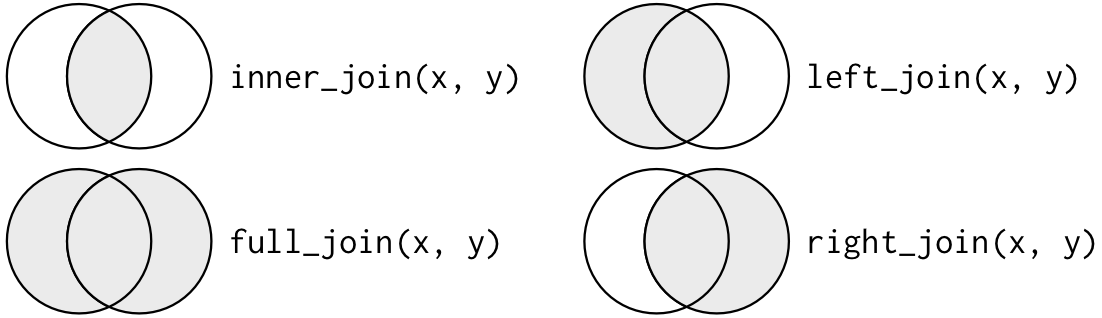

Below is an illustration using small datasets of the different joins and how they work. You can see which rows are being kept and which ones are being removed when you apply the various joins. 

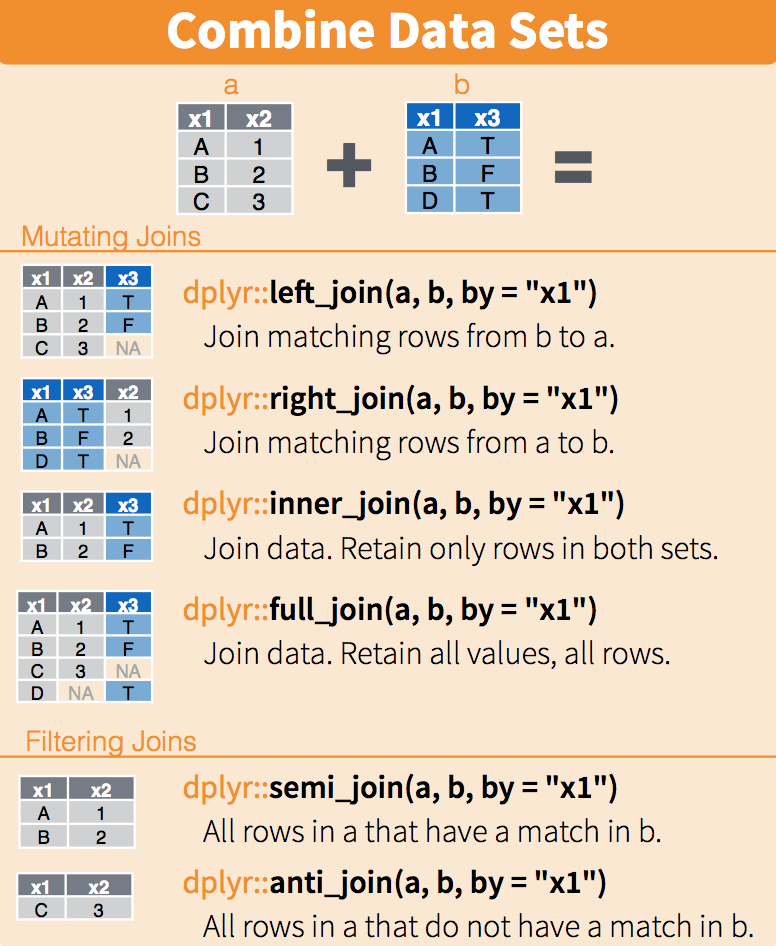

Left join is the most commonly used join. You use this whenever you add additional data from another table, because it preserves the original observations even when there isn’t a match. If there isn't a match then `NA` will be filled in.

# Applying Left Joins
When might you use left or right joins? Suppose you want to know which census blocks don't have any jobs. Then, we'd want to make sure that we keep all of the census blocks in the geography crosswalk, even if they aren't present in the workplace area characteristics tables, and add in the workplace area characteristics. This would mean that any blocks with a `null` value in the `C000` column would be blocks without any jobs. 

To do this `JOIN`, we can use the `LEFT JOIN` statement as demonstrated above.

In [20]:
df_left_join <- left_join(ca_wac_2015, ca_xwalk, by = c("w_geocode" = "tabblk2010"), keep = TRUE)  %>% 
    select (w_geocode, tabblk2010, C000, CA01, CA02, CA03, ctyname, cbsaname)  

In [21]:
df_left_join

w_geocode,tabblk2010,C000,CA01,CA02,CA03,ctyname,cbsaname
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
060014001001007,060014001001007,30,2,16,12,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001008,060014001001008,4,0,1,3,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001011,060014001001011,3,2,1,0,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001017,060014001001017,11,3,3,5,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001024,060014001001024,10,3,3,4,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001026,060014001001026,3,0,2,1,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001027,060014001001027,13,3,3,7,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001032,060014001001032,13,2,4,7,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001033,060014001001033,2,0,0,2,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"


w_geocode,tabblk2010,C000,CA01,CA02,CA03,ctyname,cbsaname
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
060014001001007,060014001001007,30,2,16,12,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001008,060014001001008,4,0,1,3,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001011,060014001001011,3,2,1,0,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001017,060014001001017,11,3,3,5,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001024,060014001001024,10,3,3,4,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001026,060014001001026,3,0,2,1,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001027,060014001001027,13,3,3,7,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001032,060014001001032,13,2,4,7,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"
060014001001033,060014001001033,2,0,0,2,"Alameda County, CA","San Francisco-Oakland-Berkeley, CA"


By setting the parameter `keep = TRUE`, we can see how `left_join` matches the variables `w_geocode` and `tabblk2010`.

## <span style="color:red">Checkpoint: Get Census Data and Join with your Tables

Try joining the Residence Area Characteristics table with the Crosswalk table in a similar manner, as well as changing some of the columns to display. As you construct your query, make sure you answer the following question regarding the join:

- What are they being joined on? That is, what is the "ID" variable you're matching on in each table?
- What information does the resulting table give you? For example, after we join the WAC table to the geography crosswalk table, we are now able to determine counties or metropolitan/micropolitan areas for census block containing workplaces.
    > Hint: the Residence Area Characteristics table is title `ca_rac_2015` and the Crosswalk table is title `ca_xwalk`.



Lets figure out how many jobs are in each county. The first thing we want to do is `group_by` `ctyname`. Then we want to use the `summarize` function to sum the total number jobs in the `C000` column. Finally, we need to use the `ungroup()` function because if we don't, future calculations will likely produce errors.  

In [22]:
total_jobs_by_county <- df_left_join %>%
    group_by(ctyname) %>%
    summarize(
        total_jobs = sum(C000)
    ) %>%
    ungroup() 

total_jobs_by_county

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



ctyname,total_jobs
<chr>,<dbl>
"Alameda County, CA",751240
"Alpine County, CA",398
"Amador County, CA",11214
"Butte County, CA",76587
"Calaveras County, CA",8436
"Colusa County, CA",9551
"Contra Costa County, CA",359762
"Del Norte County, CA",7844
"El Dorado County, CA",49992


ctyname,total_jobs
<chr>,<dbl>
"Alameda County, CA",751240
"Alpine County, CA",398
"Amador County, CA",11214
"Butte County, CA",76587
"Calaveras County, CA",8436
"Colusa County, CA",9551
"Contra Costa County, CA",359762
"Del Norte County, CA",7844
"El Dorado County, CA",49992


Now that we have total amount of jobs by county, let's calculate the proportion of jobs by county and then order them in descending order. This can be accomplished by taking the existing data frame `total_jobs_by_county` then using the `arrange()` function to order the variable `total_jobs`. Then, we can use the `mutate()` function to add a column called `prop` and setting that equal to `total_jobs` divided by the sum of `total_jobs`. I multiplied the results by 100 to get the percentage.

In [32]:
total_jobs_prop <- total_jobs_by_county %>%
    arrange(desc(total_jobs)) %>%
    mutate(
        prop = total_jobs/sum(total_jobs)*100) 
total_jobs_prop

ctyname,total_jobs,prop
<chr>,<dbl>,<dbl>
"Los Angeles County, CA",4443135,27.685245459
"Orange County, CA",1578369,9.834842558
"San Diego County, CA",1338649,8.341143393
"Santa Clara County, CA",1006868,6.273810659
"Alameda County, CA",751240,4.680988491
"San Francisco County, CA",700616,4.365549535
"San Bernardino County, CA",685642,4.272246301
"Riverside County, CA",649800,4.048914224
"Sacramento County, CA",631501,3.934892861


ctyname,total_jobs,prop
<chr>,<dbl>,<dbl>
"Los Angeles County, CA",4443135,27.685245459
"Orange County, CA",1578369,9.834842558
"San Diego County, CA",1338649,8.341143393
"Santa Clara County, CA",1006868,6.273810659
"Alameda County, CA",751240,4.680988491
"San Francisco County, CA",700616,4.365549535
"San Bernardino County, CA",685642,4.272246301
"Riverside County, CA",649800,4.048914224
"Sacramento County, CA",631501,3.934892861


## <span style="color:red">Checkpoint: Types of Joins</span>

Consider the following situations. How would you answer the question posed? What type of join should you use for each one? Which tables do you need to join? Try doing the join.

- How many census blocks in the state contain a workplace and how many don't? Recall that the geography crosswalk table contains information about the census blocks in the state.
- Which county contains the most census blocks containing a workplace?
- Which metropolitan/micropolitan area had the most census blocks containing a residence of a worker in the state?

### Visualizations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



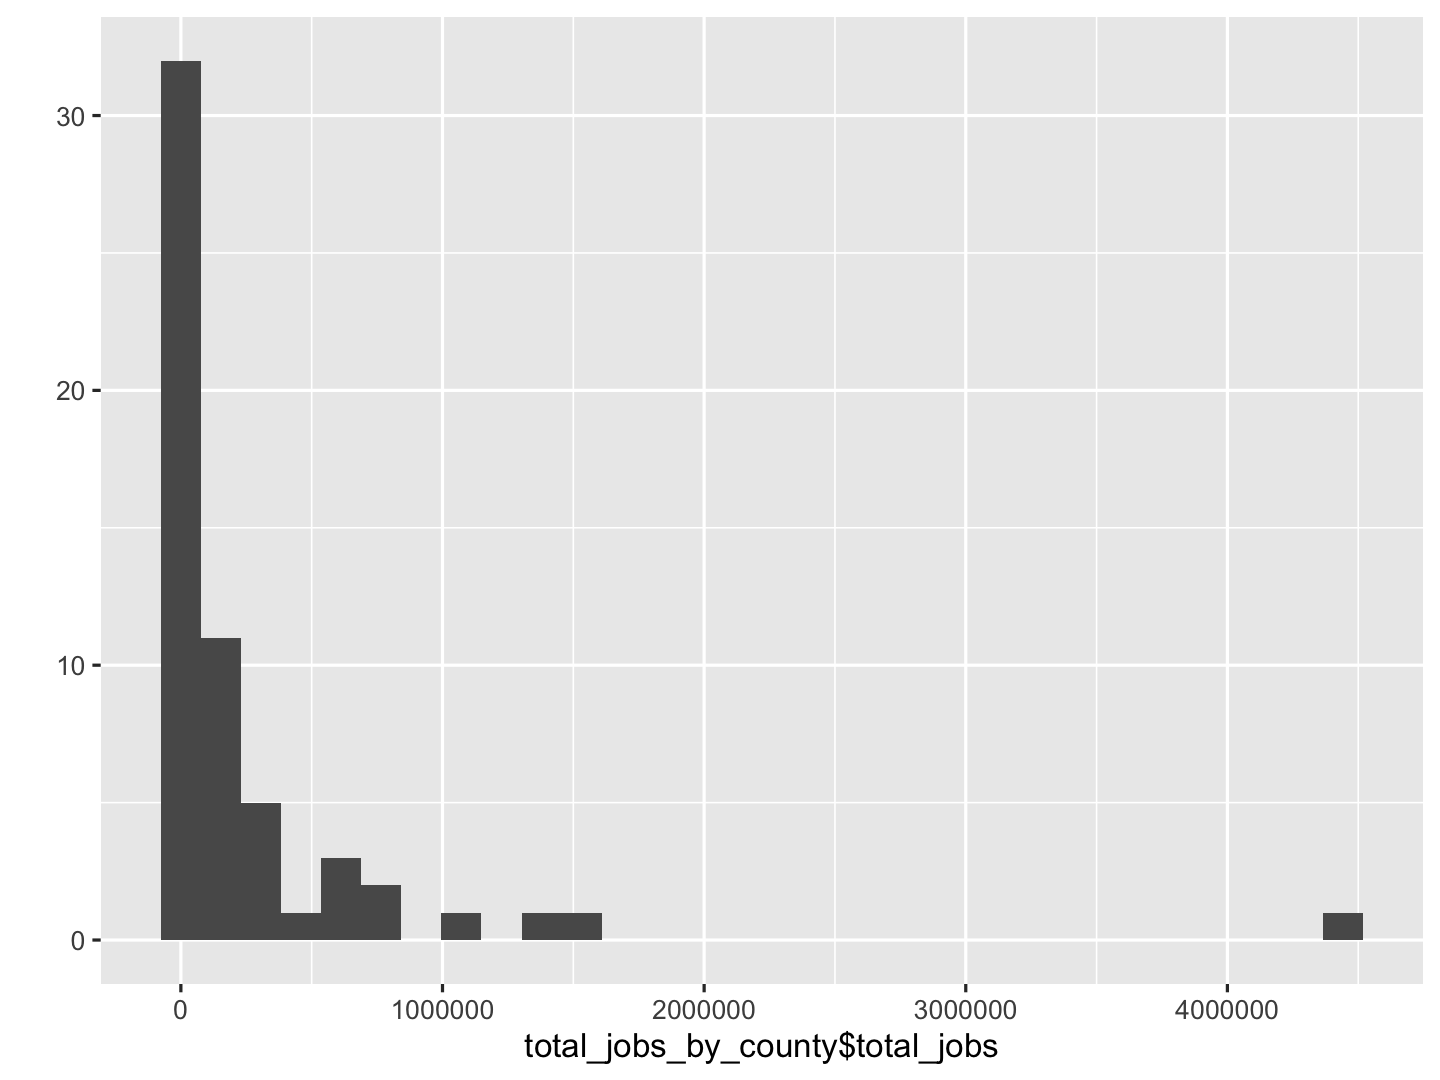

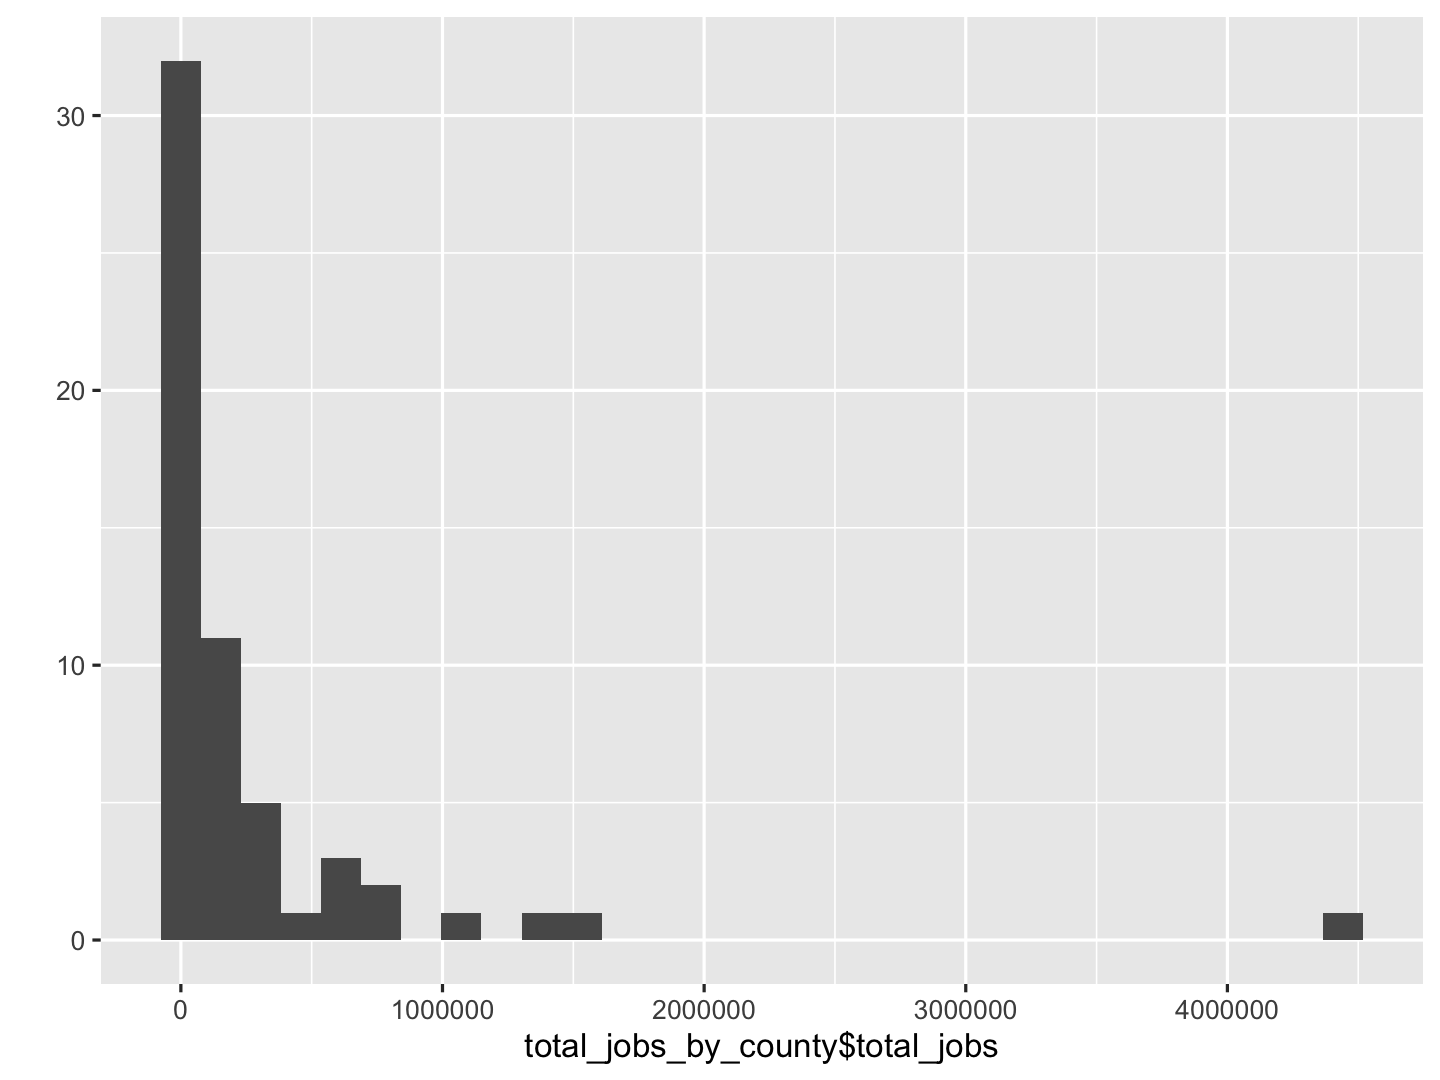

In [31]:
qplot(total_jobs_by_county$total_jobs)

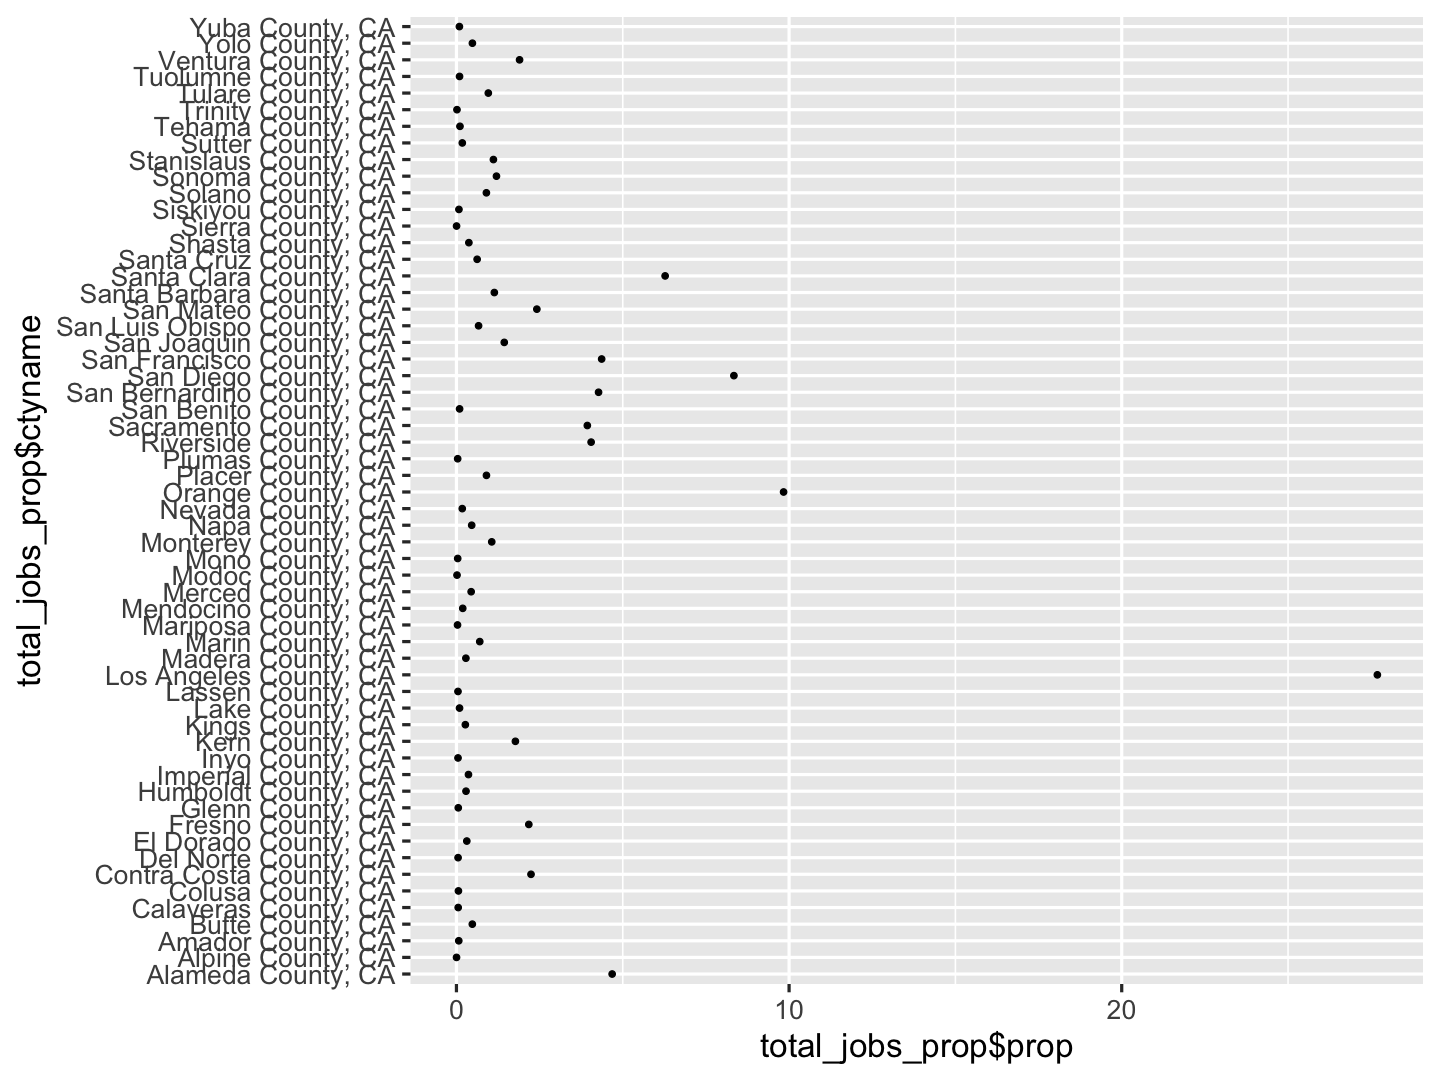

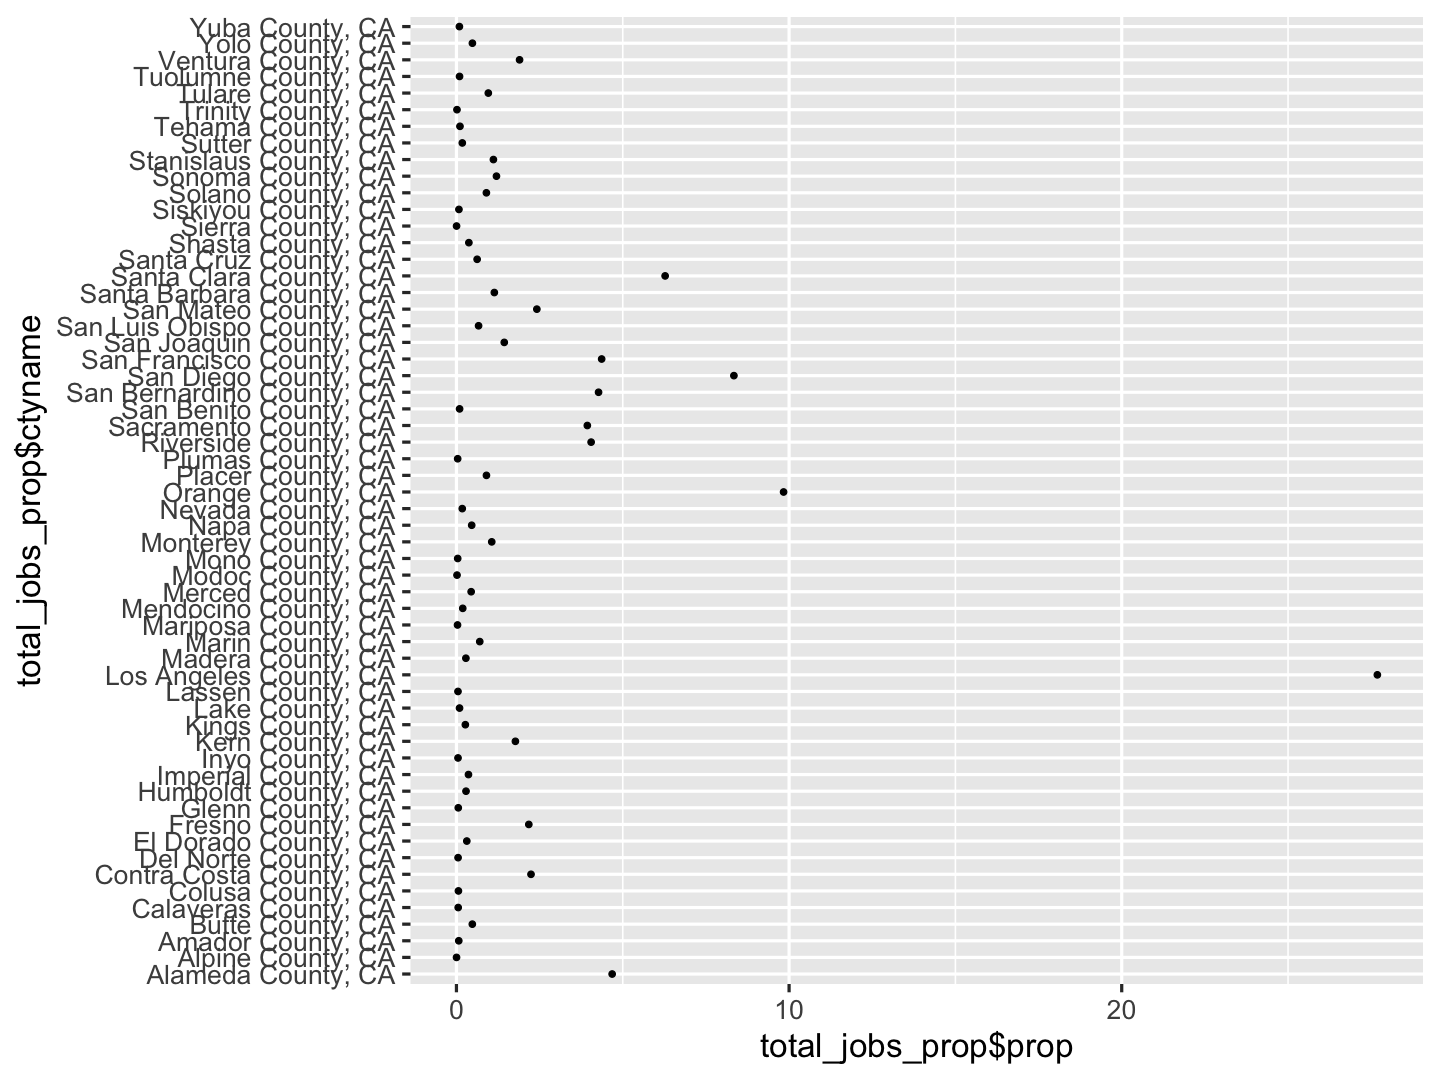

In [26]:
qplot(total_jobs_prop$prop, total_jobs_prop$ctyname)

## <span style="color:red">Checkpoint: Visualize Your Data</span>

Using the methods we've described above, try visualizing data from a different state. What do the visualizations tell you? How are they different from the data from California? How are they the same? Does this make sense?